In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'Noto Sans CJK TC'
plt.rcParams['axes.unicode_minus']=False

In [2]:
data_107 = pd.read_csv("107.csv", dtype='unicode')
data_108 = pd.read_csv("108.csv", dtype='unicode')
data_109 = pd.read_csv("109.csv", dtype='unicode')
data_1101 = pd.read_csv("110-1.csv", dtype='unicode')
data_1102 = pd.read_csv("110-2.csv", dtype='unicode')

In [11]:
# 統一命名
col_name = [
    '案件編號', '當事者順位', '國籍', '當事者屬性別代碼', '當事者屬性別名稱', '當事者事故發生時年齡',
    '當事者區分類別大類別名稱-車種', '當事者區分類別子類別名稱-車種', '牌照種類名稱', '受傷程度名稱', '主要傷處名稱',
    '保護裝備名稱', '肇因研判子類別名稱 - 個別'
]

data_108.columns = col_name
data_109.columns = col_name
data_1101.columns = col_name
data_1102.columns = col_name

In [17]:
#合併資料
data = pd.concat([data_108, data_109, data_1101, data_1102])
data = data.reset_index(drop=True)

data.shape

(266372, 13)

In [18]:
data.head(2)

,案件編號,當事者順位,國籍,當事者屬性別代碼,當事者屬性別名稱,當事者事故發生時年齡,當事者區分類別大類別名稱-車種,當事者區分類別子類別名稱-車種,牌照種類名稱,受傷程度名稱,主要傷處名稱,保護裝備名稱,肇因研判子類別名稱 - 個別
0,10801AC191A0011,1,1,1,男,25,小客車,自用,汽車,未受傷,無,戴安全帽或繫安全帶(使用幼童安全椅),違反號誌管制或指揮
1,10801AC191A0011,2,1,2,女,66,機車,普通重型,重機,24小時內死亡,多數傷,戴安全帽或繫安全帶(使用幼童安全椅),尚未發現肇事因素


In [19]:
# 儲存資料
data.to_csv("事故傷亡統計_當事者資料.csv", index=False, encoding='utf_8_sig')

# -----

In [30]:
data = pd.read_csv("事故傷亡統計_當事者資料.csv", dtype='unicode')

In [31]:
data['當事者順位'] = data['當事者順位'].astype('int')
data['當事者屬性別代碼'] = data['當事者屬性別代碼'].astype('float')
data['當事者事故發生時年齡'] = data['當事者事故發生時年齡'].astype('int')

In [32]:
dead_df = data[data['受傷程度名稱'].isin(['24小時內死亡', '2-30日內死亡'])]

In [9]:
dead_df.to_csv("當事者資料_只有死亡.csv", index=False, encoding='utf_8_sig')

In [5]:
dead_df.head(2)

,案件編號,年,月,當事者順位,國籍,當事者屬性別代碼,當事者屬性別名稱,當事者事故發生時年齡,當事者區分類別大類別名稱-車種,當事者區分類別子類別名稱-車種,牌照種類名稱,受傷程度名稱,主要傷處名稱,保護裝備名稱,肇因研判子類別名稱 - 個別
1,10801AC191A0011,108,1,2,1,2.0,女,66,機車,普通重型,重機,24小時內死亡,多數傷,戴安全帽或繫安全帶(使用幼童安全椅),尚未發現肇事因素
1152,10801AC191F0005,108,1,1,1,1.0,男,87,慢車,腳踏自行車,,24小時內死亡,頭部,戴安全帽或繫安全帶(使用幼童安全椅),不明原因肇事


<AxesSubplot:>

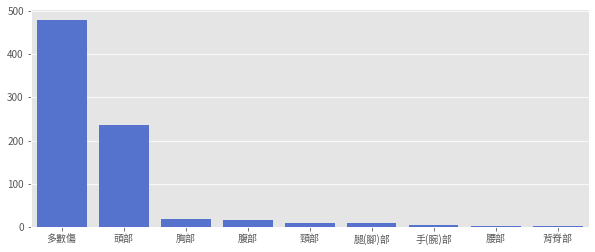

In [62]:
s = '主要傷處名稱'
plt.figure(figsize=(10, 4)) 
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

<AxesSubplot:xlabel='年', ylabel='count'>

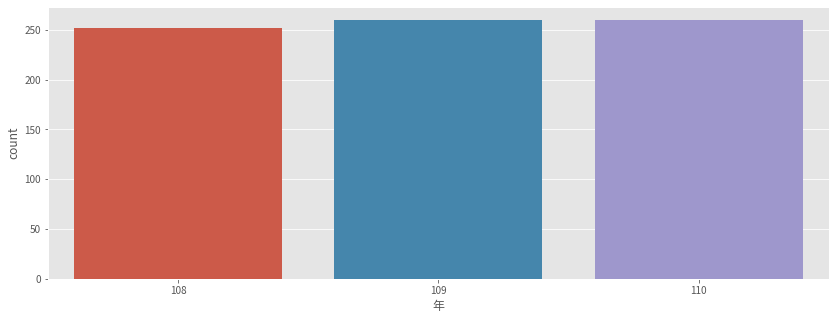

In [33]:
plt.figure(figsize=(14, 5)) 
sns.countplot(x='年', data=dead_df) 

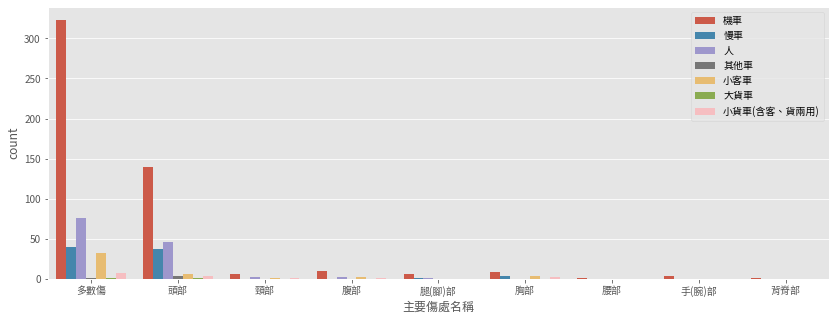

In [8]:
plt.figure(figsize=(14, 5)) 
sns.countplot(x='主要傷處名稱', hue="當事者區分類別大類別名稱-車種", data=dead_df) 
plt.legend(loc='upper right') 

<AxesSubplot:>

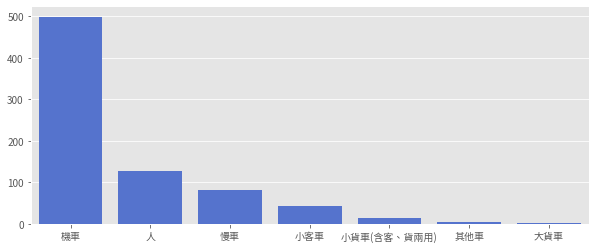

In [7]:
s = '當事者區分類別大類別名稱-車種'
plt.figure(figsize=(10, 4))
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

<AxesSubplot:>

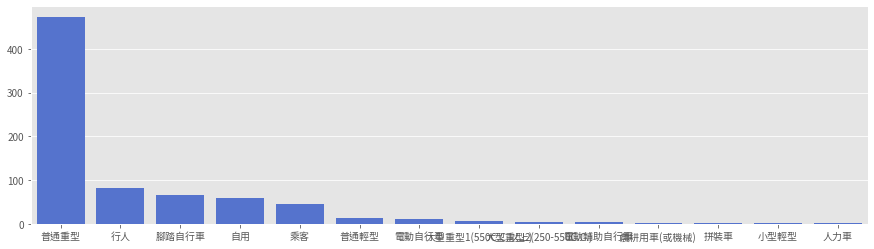

In [71]:
s = '當事者區分類別子類別名稱-車種'
plt.figure(figsize=(15, 4))
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

<AxesSubplot:>

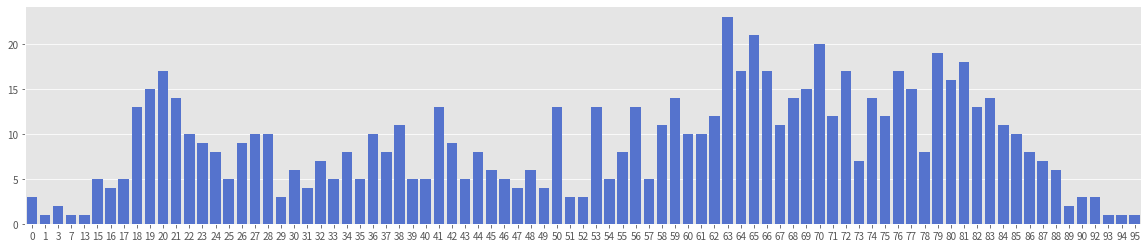

In [65]:
s = '當事者事故發生時年齡'
plt.figure(figsize=(20, 4))
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

<AxesSubplot:>

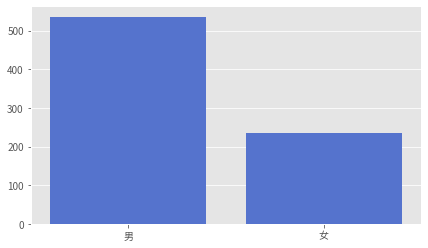

In [67]:
s = '當事者屬性別名稱'
plt.figure(figsize=(7, 4))
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

<AxesSubplot:>

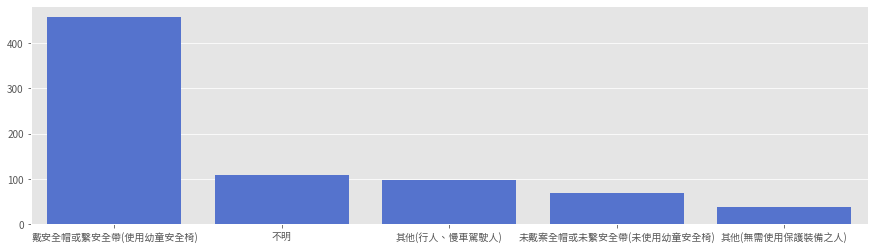

In [69]:
s = '保護裝備名稱'
plt.figure(figsize=(15, 4))
sns.barplot(x=list(dead_df[s].value_counts().index), 
            y=list(dead_df[s].value_counts()), 
            color='royalblue') 

# 位置

In [103]:
#data = pd.read_csv("事故傷亡統計_當事者資料.csv", dtype='unicode')
#df = data[data['受傷程度名稱'].isin([''])].reset_index(drop=True)
# 儲存資料
# df.to_csv("事故傷亡統計_當事者資料110.csv", index=False, encoding='utf_8_sig')

In [10]:
# load data
whole = pd.read_csv("道路交通事故原因傷亡統計107-110_有路燈.csv", dtype='unicode')
data = pd.read_csv("事故傷亡統計_當事者資料110.csv", dtype='unicode')

In [105]:
data.head(2)

,案件編號,年,月,當事者順位,國籍,當事者屬性別代碼,當事者屬性別名稱,當事者事故發生時年齡,當事者區分類別大類別名稱-車種,當事者區分類別子類別名稱-車種,牌照種類名稱,受傷程度名稱,主要傷處名稱,保護裝備名稱,肇因研判子類別名稱 - 個別
0,11001AC191A0002,110,1,1,1,2,女,60,機車,普通重型,重機,24小時內死亡,多數傷,戴安全帽或繫安全帶(使用幼童安全椅),未注意車前狀態
1,11001AC191B0012,110,1,1,1,1,男,68,小客車,自用,汽車,未受傷,無,戴安全帽或繫安全帶(使用幼童安全椅),其他引起事故之違規或不當行為


In [108]:
from tqdm import tqdm, trange
id_list = list(data['案件編號'])
id_ = id_list[0]
df = whole[whole['案件編號']==id_][['案件編號', '年分', '月份', '發生時間', '議員選區', '道路型態_大類別', '號誌種類', '路燈數量']]

for i in tqdm(range(1, data.shape[0])):
    id_ = id_list[i]
    df2 = whole[whole['案件編號']==id_][['案件編號', '年分', '月份', '發生時間', '議員選區', '道路型態_大類別', '號誌種類', '路燈數量']]
    df = df.append(df2)

100%|████████████████████████████████████████████████████████████████████████████| 92317/92317 [17:56<00:00, 85.75it/s]


In [109]:
df.shape

(92318, 8)

In [110]:
data.shape

(92318, 15)

In [118]:
data = df.join(data.set_index('案件編號'), on='案件編號')
data.to_csv("事故傷亡統計_當事者資料110.csv", index=False, encoding='utf_8_sig')

In [16]:
from tqdm import tqdm, trange
id_list = list(dead_df['案件編號'])
id_ = id_list[0]
df = whole[whole['案件編號']==id_][['案件編號', '年分', '月份', '發生時間', '議員選區', '道路型態_大類別', '號誌種類', '路燈數量']]

for i in tqdm(range(1, dead_df.shape[0])):
    id_ = id_list[i]
    df2 = whole[whole['案件編號']==id_][['案件編號', '年分', '月份', '發生時間', '議員選區', '道路型態_大類別', '號誌種類', '路燈數量']]
    df = df.append(df2)

100%|███████████████████████████████████████████████████████████| 771/771 [00:11<00:00, 64.82it/s]


In [17]:
df.shape

(766, 8)

In [18]:
dead_df.shape

(772, 15)

In [25]:
dead_df_2 = df.join(data.set_index('案件編號'), on='案件編號').reset_index(drop=True)
dead_df_2.to_csv("當事者資料_全_死亡.csv", index=False, encoding='utf_8_sig')

# 當事者資料_全_死亡

In [36]:
data = pd.read_csv("當事者資料_全_死亡.csv", dtype='unicode')

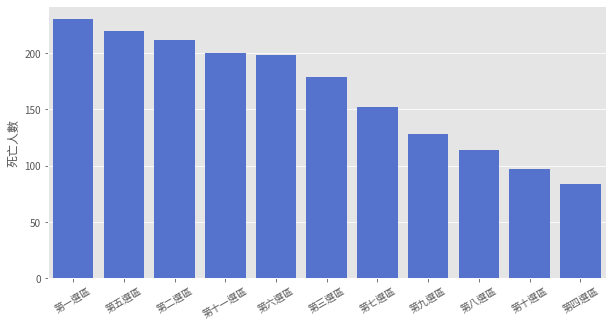

In [42]:
x = '議員選區'
plt.figure(figsize=(10, 5))
sns.barplot(x=list(data[x].value_counts().index), 
            y=list(data[x].value_counts()), 
            color='royalblue')
plt.xticks(rotation=30)
plt.ylabel("死亡人數")
plt.show()

<AxesSubplot:xlabel='議員選區', ylabel='count'>

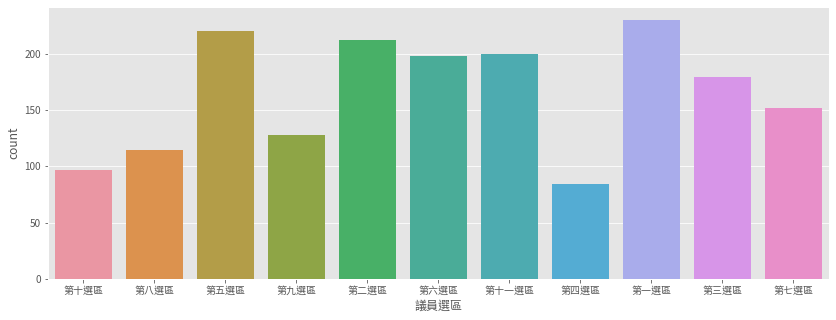

In [37]:
plt.figure(figsize=(14, 5)) 
sns.countplot(x='議員選區', data=data) 


In [ ]:
plt.figure(figsize=(14, 5)) 
sns.countplot(x='主要傷處名稱', hue="當事者區分類別大類別名稱-車種", data=data) 
plt.legend(loc='upper right') 

In [43]:
data = pd.read_csv("道路交通事故原因傷亡統計107-110_有路燈 (1).csv", dtype='unicode')

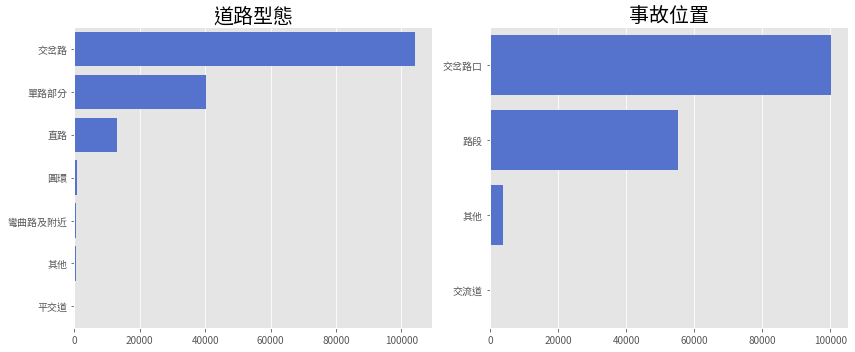

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.barplot(x=list(data['道路型態_大類別'].value_counts()), 
            y=list(data['道路型態_大類別'].value_counts().index), 
            color='royalblue', orient='h', ax=axes[0]) 
axes[0].set_title("道路型態", fontsize=20)
sns.barplot(x=list(data['事故位置'].value_counts()), 
            y=list(data['事故位置'].value_counts().index), 
            color='royalblue', orient='h', ax=axes[1]) 
axes[1].set_title("事故位置", fontsize=20)
fig.tight_layout()

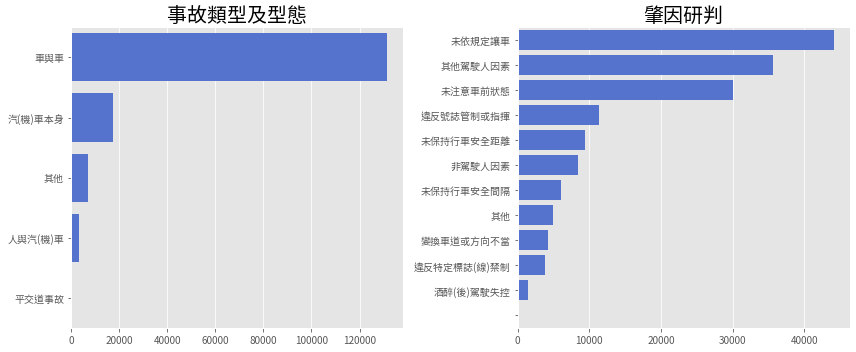

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.barplot(x=list(data['事故類型及型態'].value_counts()), 
            y=list(data['事故類型及型態'].value_counts().index), 
            color='royalblue', orient='h', ax=axes[0]) 
axes[0].set_title("事故類型及型態", fontsize=20)

sns.barplot(x=list(data['肇因研判'].value_counts()), 
            y=list(data['肇因研判'].value_counts().index), 
            color='royalblue', orient='h', ax=axes[1]) 
axes[1].set_title("肇因研判", fontsize=20)
fig.tight_layout()

In [63]:
data.shape

(159407, 23)